In [200]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import norm
from scipy.stats import t


In [201]:
df = pd.read_csv('sslc1.csv', sep=';',na_values='AA')
df.head()

,region,roll_number,name,sl,fl,math,sci,ss,total,pass,withheld,extra
0,A,10001,DISMA J SURUTHY,53.0,36.0,28.0,16.0,44.0,177.0,NaN,NaN,NaN
1,A,10002,PARVIN M,58.0,37.0,42.0,35.0,40.0,212.0,P,NaN,NaN
2,A,10003,MANIKANDAN M,72.0,56.0,71.0,55.0,70.0,324.0,P,NaN,NaN
3,A,10004,PRABU R,87.0,64.0,83.0,58.0,65.0,357.0,P,NaN,NaN
4,A,10005,ARUNRAJ K,59.0,45.0,50.0,35.0,48.0,237.0,P,NaN,NaN


In [202]:
df.describe()

,roll_number,sl,fl,math,sci,ss,total,extra
count,185667.000000,185642.000000,185532.000000,185624.000000,185615.000000,185615.000000,185666.000000,0.0
mean,105014.949043,73.564430,53.837435,62.847983,50.712265,63.188266,304.056510,NaN
std,54921.152696,14.124606,15.337772,23.483041,20.049138,16.915145,80.572719,NaN
min,10001.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,NaN
25%,57314.500000,65.000000,43.000000,43.000000,35.000000,51.000000,246.000000,NaN
50%,105291.000000,76.000000,53.000000,62.000000,49.000000,64.000000,302.000000,NaN
75%,152581.500000,85.000000,65.000000,84.000000,65.000000,76.000000,366.000000,NaN
max,199999.000000,98.000000,97.000000,100.000000,100.000000,100.000000,488.000000,NaN


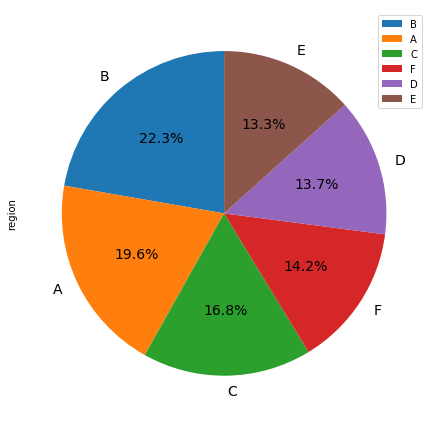

In [203]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df['region'].value_counts().plot.pie( ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = True, fontsize=14)

In [204]:
def box_plot(region):
    df1 = df.copy()
    del df1['total']
    del df1['pass']
    del df1['withheld']
    del df1['extra']
    del df1['roll_number']
    del df1['name']
    if region != 'ALL':
        df2 = df1[df1['region']==region]
        df2.boxplot()
    else :
        df1.boxplot()
    plt.show()
    

In [205]:
interact(box_plot , region = ['A', 'B'  ,'C', 'D' ,'E' ,'F','ALL'])  

<function __main__.box_plot>

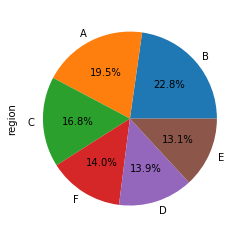

In [206]:
df1=df[df['pass']=='P']
ax1 = plt.subplot(111, aspect='equal')
df1['region'].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax1 )
plt.show()

In [207]:
def corr_func(a , b):
    df.plot.scatter(x=a, y=b);
    plt.show()
    return print('correlation coefficient=',df[a].corr(df[b]))


In [208]:
interact(corr_func, a= ['fl' , 'sl' ,'math' , 'sci' , 'ss'] , b = [  'sl' ,'math' , 'sci' , 'ss','fl'])

<function __main__.corr_func>

## Assuming that standard deviation of the original data set(i.e of all the regions) is known 
### we use standard  normal  to determine the confidence ratio

In [209]:
df2=df[df['region']=='C']
df2=df2['math']
sample_mean = df2.mean()
sample_stnd = df2.std()
original_standard_deveation = df['math'].std()                        
n = len(df2)                          

In [210]:
rv1= norm (loc =0 , scale= 1)

min = rv1.ppf(0.025)          
max = rv1.ppf(0.975) 


a=(min*original_standard_deveation)/np.sqrt(n)
b=(max*original_standard_deveation)/np.sqrt(n)

print('95% confidence interval=','(',sample_mean+a,',',sample_mean+b,')')
    
    
    

95% confidence interval= ( 62.4732561286 , 62.9938882824 )


##  now if we don't know either the true mean nor the true standard deviation

###  we use t distribution 

In [211]:
from scipy.stats import t
rv2= t (n-1)


min = rv2.ppf(0.025)          
max = rv2.ppf(0.975) 


a=(min*sample_stnd)/np.sqrt(n)
b=(max*sample_stnd)/np.sqrt(n)

print('95% confidence interval=','(',sample_mean+a,',',sample_mean+b,')')
    
    
    

95% confidence interval= ( 62.473075288 , 62.994069123 )


In [212]:
def a_pecentile(x):
    b = []
    for i in range(1000):
        a = df2.sample(2000, replace=True)       
        b.append(a.mean())
    print(np.percentile(b,x))

    

In [213]:
a_pecentile(2.5)
a_pecentile(97.5)

61.6832125
63.7906103177
